# Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# DataFrame Overview

In [2]:
df =pd.read_csv(r'Airline_Dataset.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [3]:
# Untuk mempermudah dalam pengambilan kolom
df.columns=[each.replace(" ","_") for each in df.columns]
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'Satisfaction'],
      dtype='object')

In [4]:
df.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
# Descriptive Categorial
cate = df.dtypes[(df.dtypes != 'int64') & (df.dtypes != 'float64')].index
df[cate].describe()

,Gender,Customer_Type,Type_of_Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


Berdasarkan statistik descriptive diatas, terdapat beberapa hal yang menjadi point penting:


1.   Melihat kedekatan nilai median dengan mean serta keberadaan nilai Q2(quartile 0.5) diantara nilai Q1 dan Q3, mengindikasikan bahwa kolom 'Age', 'Departure/Arrival convenient', 'Gate location'  cenderung terdistribusi secara normal.
2.   Terdapat 15 kolom yang memiliki nilai minimum = 0 , dimana asumsi nilai 0 mengartikan bahwa user tidak melakukan pengisian survey. hal ini perlu dimanipulasi tentunya pada data preprocessing.
3.   Identifikasi outlier juga terlihat dengan memvalidasi nilai yang sesuai terhadap masing-masing kolom. pada kolom kategorial tidak ditemukan outlier sedangkan pada data numerik perlu ada pembahasan yang lebih mendalam pada kolom Age, Flight distance, Arrival atau Departure Delay Time.

# **Data Cleaning**

### Filtering data which have complate values

Dengan Asumsi bahwa data dengan nilai nol mencerminkan tidak adanya pengisian atau tidak memiliki arti apa-apa, maka data yang mengandung nilai tersebut harus dibuang.

In [ ]:
#Checking the sum of zero data each columns
(df==0).sum()

id                                       0
Gender                                   0
Customer_Type                            0
Age                                      0
Type_of_Travel                           0
Class                                    0
Flight_Distance                          0
Inflight_wifi_service                 3916
Departure/Arrival_time_convenient     6681
Ease_of_Online_booking                5682
Gate_location                            1
Food_and_drink                         132
Online_boarding                       3080
Seat_comfort                             1
Inflight_entertainment                  18
On-board_service                         5
Leg_room_service                       598
Baggage_handling                         0
Checkin_service                          1
Inflight_service                         5
Cleanliness                             14
Departure_Delay_in_Minutes           73356
Arrival_Delay_in_Minutes             72753
Satisfactio

In [6]:
df_zero= df[((df['Inflight_wifi_service']!=0)&(df['Departure/Arrival_time_convenient']!=0)&(df['Ease_of_Online_booking']!=0)
             &(df['Gate_location']!=0)&(df['Food_and_drink']!=0)&(df['Online_boarding']!=0)&(df['Seat_comfort']!=0)&(df['Inflight_entertainment']!=0)
             &(df['On-board_service']!=0)&(df['Leg_room_service']!=0)&(df['Baggage_handling']!=0)&(df['Checkin_service']!=0)&(df['Inflight_service']!=0)&(df['Cleanliness']!=0))]

print(df_zero.shape)

(119567, 24)


### Handling Missing values

Identifikasi pada desciption info dataset diatas ditemukan beberapa missing value, hal ini perlu dilakukan dropping data karena jumlah missing relatif sedikit dibandingkan dengan jumlah dataset yang ada.

In [7]:
#Jumlah data null pada arrival delay in minutes.
print(df_zero.isnull().sum())
df_clean = df_zero.dropna(axis=0)   #menghapus data setiap baris yang mengandung nilai nol
df_clean.info()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             363
Satisfaction                           0
dtype: int64
<cl

In [8]:
df_clean.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
Satisfaction                         0
dtype: int64

### Handling Outlier

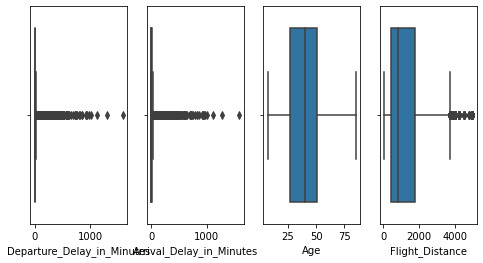

In [9]:
list_column = ['Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Age','Flight_Distance']

plt.figure(figsize=(8,4))
for i in range (len(list_column)):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=df[list_column[i]])

Mangantisipasi outlier pada flight distance dan delay time tidak perlu dimanipulasi karena data ini merupakan data nilai unik atau mencerminkan identitas data. sedangkan pada delay time data ini diinput serandom mungkin sehingga persebaran data akan tidak beraturan. alasan ini meyakinkan untuk tidak perlu dilakukan handlig data outlier.

### Handling Duplicate values

In [10]:
#Tidak ada data yang terduplikat
df_clean.duplicated().sum()

0

Setelah dilakukan pengecekan data duplikat, ternyata tidak ditemukan data yang duplikat atau dataset yang digunakan sudah unik.

### Formatting DataFrame

In [11]:
#Convert the value of target satisfaction being 1 or 0
df_clean['Satisfaction'] = df['Satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
df_clean.reset_index(drop=True).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [12]:
# Renaming the value of the Dataframe
df_clean['Customer_Type']=df_clean['Customer_Type'].map({'Loyal Customer':'Loyal','disloyal Customer':'Disloyal'})
df_clean['Type_of_Travel']=df_clean['Type_of_Travel'].map({'Personal Travel':'Personal','Business travel':'Business'})
df_clean['Class']=df_clean['Class'].map({'Eco Plus':'Economic','Eco':'Economic','Business':'Business'})
df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction
0,70172,Male,Loyal,13,Personal,Economic,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


Proses formating ini dilakukan untuk mempermudah dalam procesing data selanjutnya, dimana informasi yang relatif serupa dapat dijadikan menjadi satu data atau memodifikasi value yang ada supaya lebih mudah dimengerti seperti data kategori Satisfaction diubah secara numrik kategorial ( 0 = UnSatisfied dan 1 = Satisfied). Hal ini membantu dalam berfokus pada lebih sedikit data kategorial.

# **EDA**

In [13]:
DF= df_clean.copy()

#kolom delay time mencerminkan informasi yang sama, supaya tidak banyak dimensinya maka perlu disatukan saja.
DF['Total_Delay_Times'] = DF['Departure_Delay_in_Minutes'] + DF['Arrival_Delay_in_Minutes']
DF= DF.drop(columns=DF[['Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']])
DF.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction,Total_Delay_Times
0,70172,Male,Loyal,13,Personal,Economic,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,5047,Male,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,110028,Female,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,24026,Female,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,119299,Male,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0


Informasi nilai kolom Departure or Arrival delay time merupakan informasi jangka waktu, sehingga sebaiknya dijumlahkan saja untuk mengurangi dimensi data yang digunakan. 

## **Melihat persentase pelanggan yang puas dan tidak.**

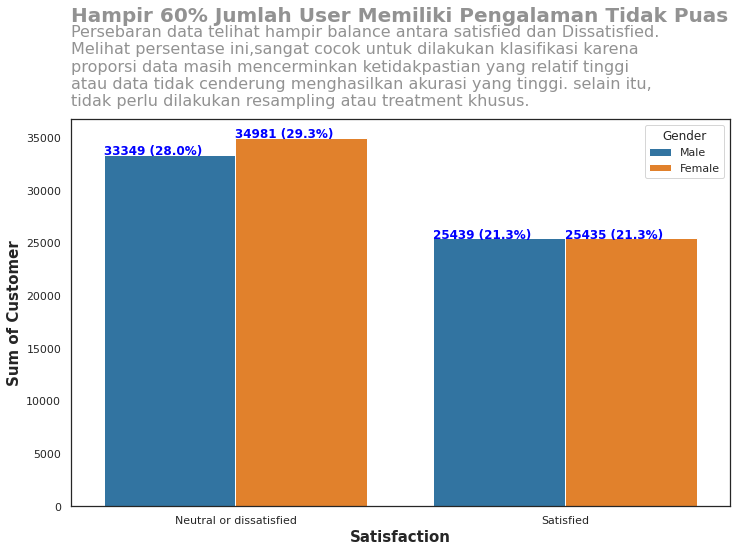

In [14]:
plt.figure(figsize=(11,8))
sns.set(style='white')
a= sns.countplot(x='Satisfaction',data=DF,palette='tab10',hue='Gender')
a.set_xticklabels(['Neutral or dissatisfied','Satisfied'])
a.text(x = -0.5, y = 46000, s = "Hampir 60% Jumlah User Memiliki Pengalaman Tidak Puas",fontsize = 20, weight = 'bold', alpha = .50)
a.text(x = -0.5, y = 38000, 
        s = 'Persebaran data telihat hampir balance antara satisfied dan Dissatisfied. \nMelihat persentase ini,sangat cocok untuk dilakukan klasifikasi karena \nproporsi data masih mencerminkan ketidakpastian yang relatif tinggi \natau data tidak cenderung menghasilkan akurasi yang tinggi. selain itu,\ntidak perlu dilakukan resampling atau treatment khusus.',
              fontsize = 16, alpha = .50)

#anotate pada label grafik
for i in a.patches:
  a.annotate(str(i.get_height())+ ' ('+str((i.get_height()/len(DF)*100).round(1)) + '%)',(i.get_x(), i.get_height()),weight='bold',color='blue')
plt.xlabel('Satisfaction',weight='bold',fontsize=15)
plt.ylabel('Sum of Customer',weight='bold',fontsize=15)
plt.tight_layout()
plt.savefig('Satisfation.png', tight_box=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


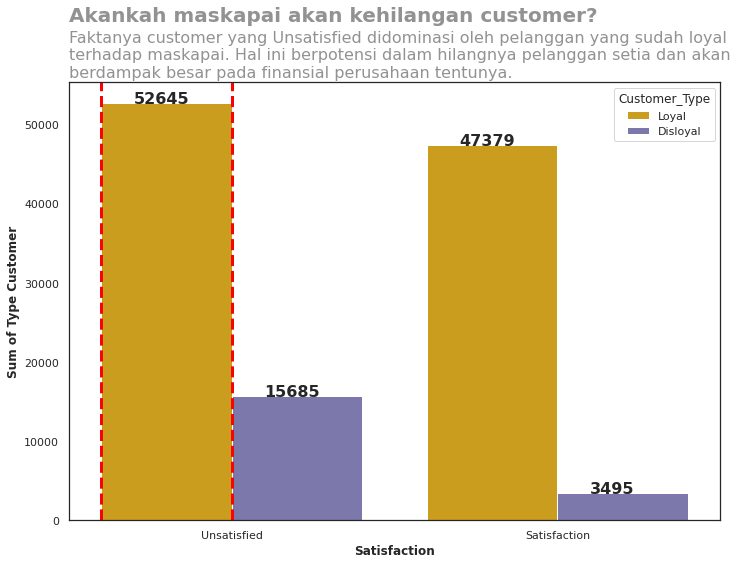

In [15]:
plt.figure(figsize=(11,8))
sns.set(style='white')
b=sns.countplot('Satisfaction',data=DF,hue='Customer_Type',palette='Dark2_r')
b.set_xticklabels(['Unsatisfied','Satisfaction'])
b.text(x = -0.5, y = 63000, s = "Akankah maskapai akan kehilangan customer?",fontsize = 20, weight = 'bold', alpha = .50)
b.text(x = -0.5, y = 56000, 
        s = 'Faktanya customer yang Unsatisfied didominasi oleh pelanggan yang sudah loyal \nterhadap maskapai. Hal ini berpotensi dalam hilangnya pelanggan setia dan akan \nberdampak besar pada finansial perusahaan tentunya.',
              fontsize = 16, alpha = .50)

for i in b.patches:
  b.annotate(str(i.get_height()),(i.get_x()+0.1,i.get_height()),weight='bold',fontsize=16)

plt.axvline(x=-0.4, color='red', linestyle='--', linewidth=3)
plt.axvline(x=0.0, color='red', linestyle='--', linewidth=3)
plt.xlabel('Satisfaction',weight='bold')
plt.ylabel('Sum of Type Customer',weight='bold')
plt.tight_layout()
plt.savefig('TypeCustomer.png', tight_box=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


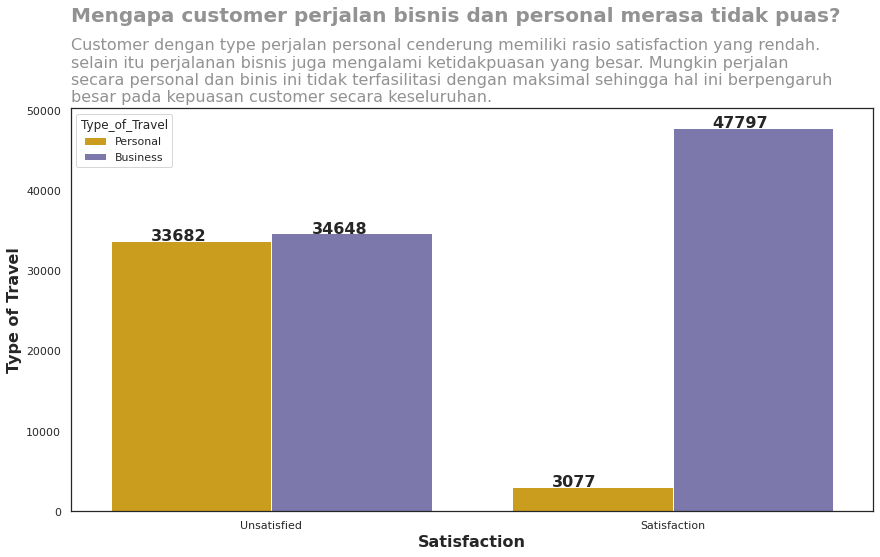

In [16]:
plt.figure(figsize=(13,8))
sns.set(style='white')
b=sns.countplot('Satisfaction',data=DF,hue='Type_of_Travel',palette='Dark2_r')
b.set_xticklabels(['Unsatisfied','Satisfaction'])
b.text(x = -0.5, y = 61000, s = "Mengapa customer perjalan bisnis dan personal merasa tidak puas?",fontsize = 20, weight = 'bold', alpha = .50)
b.text(x = -0.5, y = 51000, 
        s = 'Customer dengan type perjalan personal cenderung memiliki rasio satisfaction yang rendah. \nselain itu perjalanan bisnis juga mengalami ketidakpuasan yang besar. Mungkin perjalan \nsecara personal dan binis ini tidak terfasilitasi dengan maksimal sehingga hal ini berpengaruh \nbesar pada kepuasan customer secara keseluruhan.',
              fontsize = 16, alpha = .50)

for i in b.patches:
  b.annotate(str(i.get_height()),(i.get_x()+0.1,i.get_height()),weight='bold',fontsize=16)

plt.xlabel('Satisfaction',weight='bold',fontsize=16)
plt.ylabel('Type of Travel',weight='bold',fontsize=16)
plt.tight_layout()
plt.savefig('TypeTravel.png', tight_box=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


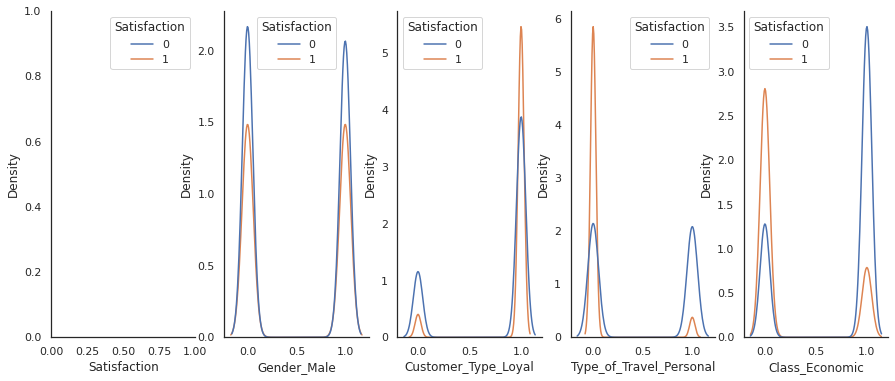

In [17]:
## Melihat Korelasi data kategorial terhadap target berdasarkan distribusi kde.
cat =DF[['Gender','Customer_Type','Type_of_Travel','Class','Satisfaction']]
categorial = pd.get_dummies(cat,drop_first=True)
categorial

fig = plt.figure(figsize=(15,6))
sns.set(style='white')
for i in range (5):
    fig.add_subplot(1,5,i+1)
    sns.kdeplot(data=categorial,x=categorial.columns[i],hue='Satisfaction')
    sns.despine()

plt.savefig('Corr_Categorial.png', tight_box=True)

Ternyata, Gander male memiliki persebaran satifaction yang mendekati identik sehingga mengindikasikan kolom tersebut punya korelasi yang rendah atau sama sekali tidak memiliki hubungan terhadap target satisfaction, maka perlu di removed saja.

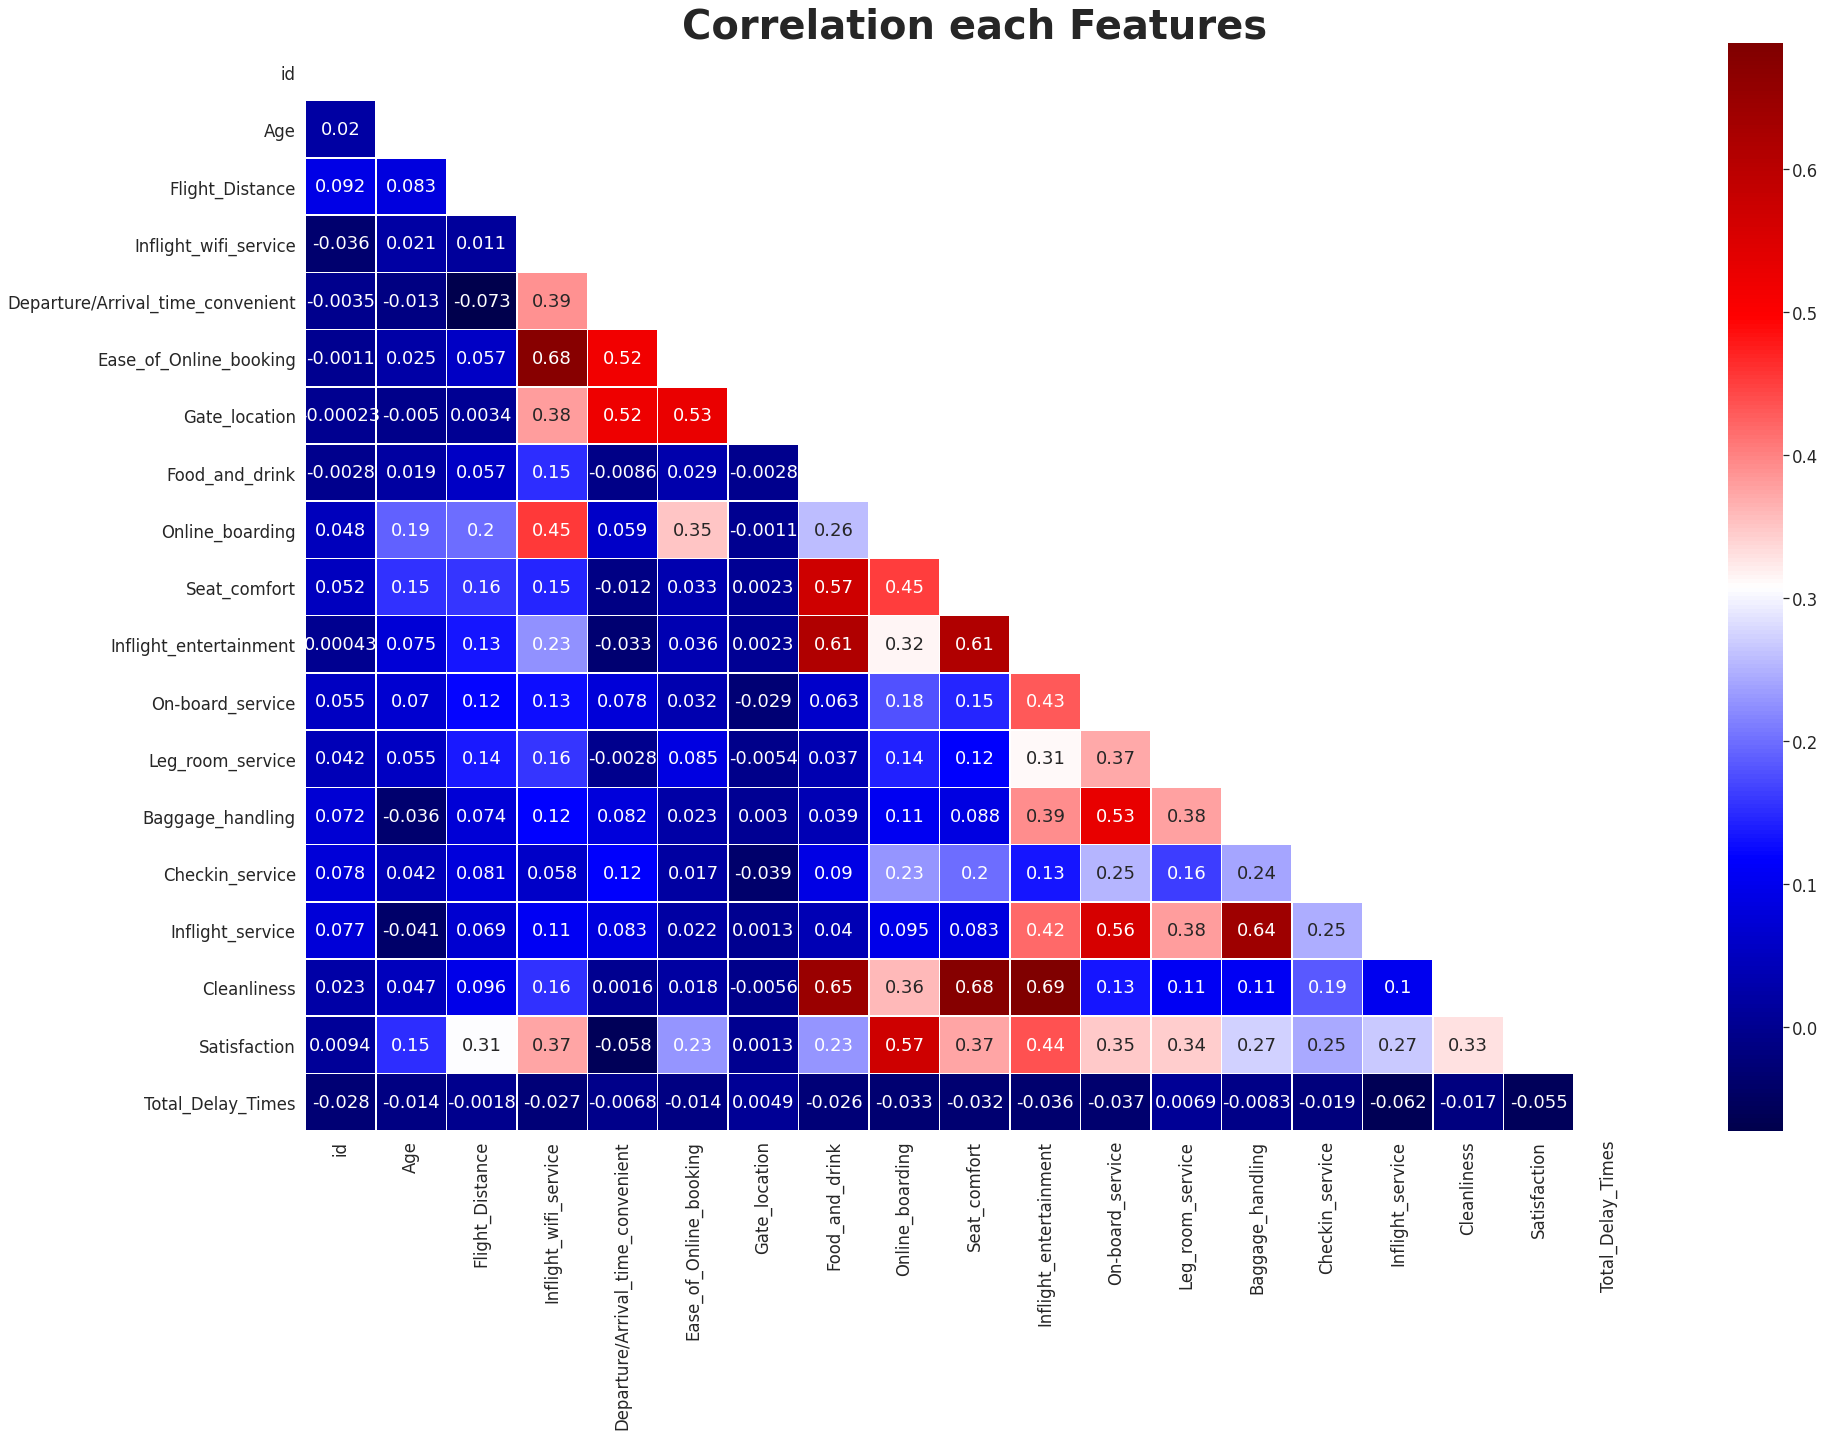

In [18]:
sns.set(style='white',font_scale=(1.5))
plt.figure(figsize=(30,20))

#mask penting untuk menghilangkan data yang duplicate.
mask = np.triu(np.ones_like(DF.corr(), dtype=bool))

sns.heatmap(DF.corr(),annot=True,linewidths=0.5,linecolor='white',cmap='seismic',mask=mask)
plt.title('Correlation each Features',weight='bold',fontsize=40)
plt.savefig('Correlation_each_feature.png', tight_box=True)

**Online Boarding memiliki correlation yang tinggi terhadap tingkat Satisfaction**
Dalam analisa hasil korelasi perlu diperhatikan beberapa hal sebagai berikut:



1.   Korelasi terhadap target satisfaction :

Online boarding memiliki korelasi yang tinggi terhadap tingkat satisfaction. selain itu, terdapat beberapa feature yang memiliki korelasi rendah atau tidak memiliki korelasi terhadap target, sehingga feature tersebut berpotensi untuk di hapus. informasi ini disimpan dulu yang kemudian diinput dalam feature engineering.
2.   Korelasi terhadap sesama features:

ada beberapa feature yang punya korelasi tinggi terhadap feature lain,hal ini berpotensi menjadi feature rebundant. feature tersebut ialah : 


-inflight entertainment terhadap inflight service.

-seat control terhadap inflight service

-inflight service terhadap baggage handling.

-gate location terhadap deperture/arrival time convenient 

-easy online booking terhadap gate location

Tetapi untuk point 2, hanya mengantisipasi ukuran dimensi saja, perlu sedikit trick atau pemahaman bisnis juga untuk memutuskan dropping salah satu features dari yang mempunyai korelasi tinggi.

# **Feature Engineering**


Berdasarkan informasi korelasi yang ditemukan sebelumya terdapat beberapa kolom yang perlu di drop untuk mengurangi dimensi dari data.
pengurangan dimensi data ini berperan dalam mempersingkat waktu prediksi pada proses machine learning dan prediksi juga mengunakan informasi yang lebih akurat.

In [19]:
DF=DF.drop(columns=['id','Age','Gender','Gate_location','Departure/Arrival_time_convenient','Total_Delay_Times'],axis=1)
DF.sample(10)

,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
72930,Loyal,Business,Business,2092,5,3,3,1,5,4,4,4,4,4,4,5,1
127481,Loyal,Business,Economic,481,3,5,3,3,3,3,2,2,4,2,3,3,0
18874,Loyal,Personal,Business,468,5,5,4,4,4,3,3,5,2,5,3,5,1
95176,Loyal,Personal,Economic,312,2,2,1,2,1,1,5,5,4,5,5,1,0
17180,Disloyal,Business,Economic,446,2,2,4,2,4,4,4,3,4,2,3,4,0
99162,Loyal,Business,Business,3234,3,3,5,5,5,4,4,4,4,3,4,3,1
20115,Loyal,Business,Business,1598,1,1,4,4,2,5,5,5,5,2,5,4,1
36760,Disloyal,Business,Business,2342,1,1,1,5,5,5,5,4,4,5,3,5,0
74835,Loyal,Personal,Economic,533,1,1,4,4,4,4,4,1,1,3,4,4,0
19249,Disloyal,Business,Economic,148,2,2,4,2,4,4,2,3,3,4,3,4,0


In [20]:
# Mengubah data categorial menjadi numerik 0 dan 1, maka ini cocok untuk data yang 2 kategorial.
df1=pd.get_dummies(DF,drop_first=True)
df1.head()

,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction,Customer_Type_Loyal,Type_of_Travel_Personal,Class_Economic
0,460,3,3,5,3,5,5,4,3,4,4,5,5,0,1,1,1
1,235,3,3,1,3,1,1,1,5,3,1,4,1,0,0,0,0
2,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1,0,0
3,562,2,5,2,2,2,2,2,5,3,1,4,2,0,1,0,0
4,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1,0,0


# **Modeling and Evaluation**

In [21]:
#dataset yang digunakan tidak mengandung target
X=df1.drop(['Satisfaction'],axis=1)
#Sebagai target pemodelan
y= df1['Satisfaction']

In [22]:
print(X.shape)
y.shape

(119204, 16)


(119204,)

In [23]:
#Sebelum melakukan pemodelan ada baiknya kita harus menstandarisasi semua nilai yang ada untuk menghindari miss-calculation
from sklearn.preprocessing import StandardScaler
ds=StandardScaler()
ds.fit(X.values)
X_tr = ds.transform(X.values)

In [ ]:
X_tr

array([[ 0.12991487, -1.78709951, -0.76391672, ...,  0.43789722,
         1.49761547,  0.97334266],
       [-1.61200002, -0.98863646, -0.98895349, ..., -2.28364087,
        -0.66772815, -1.02738741],
       [ 1.19595341, -0.92209787, -0.08180528, ...,  0.43789722,
        -0.66772815, -1.02738741],
       ...,
       [-0.73929063, -1.52094516, -0.39585659, ...,  0.43789722,
         1.49761547,  0.97334266],
       [ 0.66255968, -1.72056092, -0.09680774, ...,  0.43789722,
        -0.66772815, -1.02738741],
       [-0.81621573,  0.14251953, -0.95994875, ...,  0.43789722,
         1.49761547,  0.97334266]])

In [24]:
#Pembagian jumlah data train 80 % dan test 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

In [25]:
print(X_train.shape,y_train.shape)

(95363, 16) (95363,)


In [26]:
print(X_test.shape,y_test.shape)

(23841, 16) (23841,)


In [27]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

def run_model(model, X_train, y_train, X_test, y_test, verbose=True,):
    t0=time.time()    
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0   #menunjukkan lama waktu dalam proses prediksinya
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### LogisticRegression

Accuracy = 0.8957258504257372
ROC Area under Curve = 0.8931859510903547
Time taken = 12.453302145004272
              precision    recall  f1-score   support

           0    0.90732   0.91078   0.90905     13641
           1    0.88007   0.87559   0.87783     10200

    accuracy                        0.89573     23841
   macro avg    0.89370   0.89319   0.89344     23841
weighted avg    0.89567   0.89573   0.89569     23841



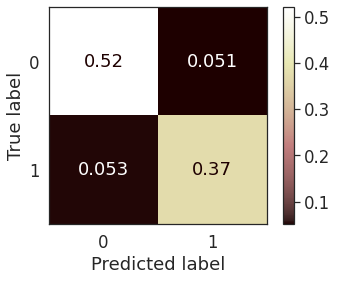

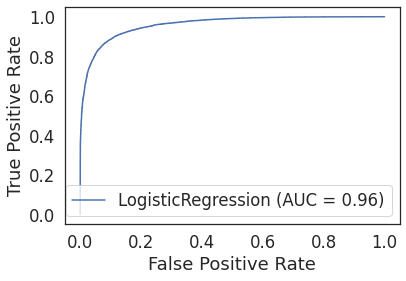

In [28]:
# LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

### GaussianNB

Accuracy = 0.8849041567048362
ROC Area under Curve = 0.8791539670629633
Time taken = 0.05889010429382324
              precision    recall  f1-score   support

           0    0.88437   0.91899   0.90135     13641
           1    0.88568   0.83931   0.86187     10200

    accuracy                        0.88490     23841
   macro avg    0.88503   0.87915   0.88161     23841
weighted avg    0.88493   0.88490   0.88446     23841



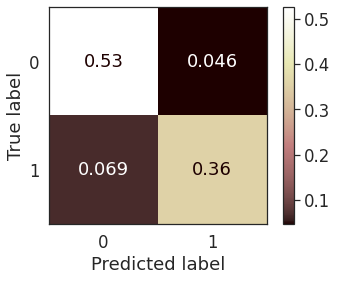

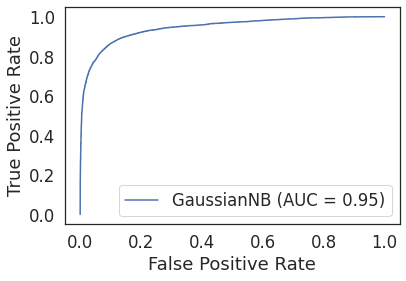

In [29]:
#Gaussian Naive Bias
model_nb = GaussianNB()
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

### KNeighborsClassifier

Accuracy = 0.8663646659116648
ROC Area under Curve = 0.8556943168734394
Time taken = 1.7362260818481445
              precision    recall  f1-score   support

           0    0.85067   0.92962   0.88840     13641
           1    0.89255   0.78176   0.83349     10200

    accuracy                        0.86636     23841
   macro avg    0.87161   0.85569   0.86094     23841
weighted avg    0.86859   0.86636   0.86491     23841



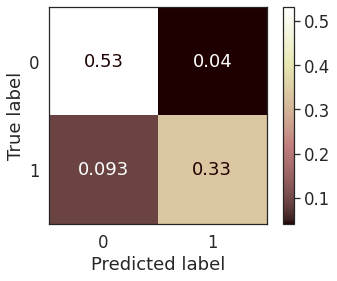

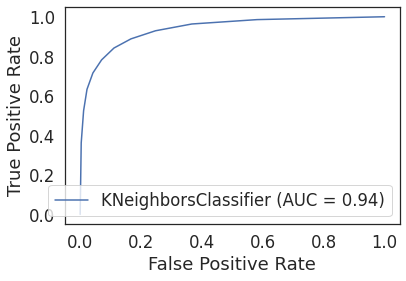

In [32]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### DecisionTree

Accuracy = 0.9377962333794724
ROC Area under Curve = 0.9349581064006866
Time taken = 0.12162590026855469
              precision    recall  f1-score   support

           0    0.93778   0.95462   0.94613     13641
           1    0.93782   0.91529   0.92642     10200

    accuracy                        0.93780     23841
   macro avg    0.93780   0.93496   0.93627     23841
weighted avg    0.93780   0.93780   0.93769     23841



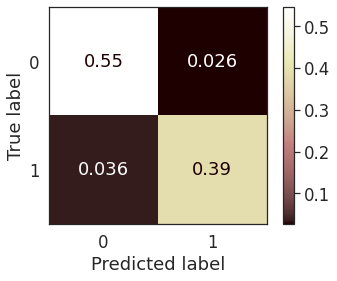

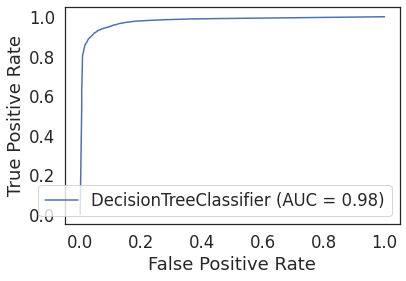

In [33]:
#DecisionTree
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### RandomForest

Accuracy = 0.962040182878235
ROC Area under Curve = 0.9590130100863745
Time taken = 8.158522844314575
              precision    recall  f1-score   support

           0    0.95486   0.97999   0.96726     13641
           1    0.97226   0.93804   0.95484     10200

    accuracy                        0.96204     23841
   macro avg    0.96356   0.95901   0.96105     23841
weighted avg    0.96230   0.96204   0.96195     23841



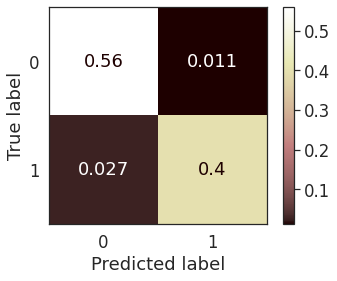

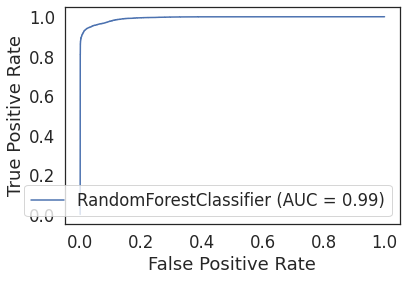

In [34]:
#RandomForest
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

 **Kesimpulan :**

RandomForest sangat baik untuk digunakan karena memiliki hasil evaluasi yang bagus.
Setelah melakukan prediksi pada data test dengan jumlah 20% dari dataset. Dimana hasil evaluasi menunjukkan nilai AUC(0.959),recall (0.97), accuration (0.96) dan precision(0.95) dengan waktu prediksi 9.49 s. 

Berdasarkan features yang ditemukan sebaiknya maskapai lebih berfokus pada dua hal yang paling signifikan mempengaruhi prediksi yakni Online boarding dan Flight Wifi Service. 